Dataset shape: (8807, 12)

Missing value per kolom:
show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


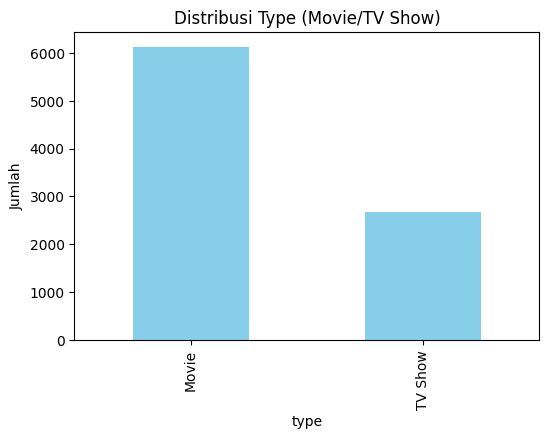

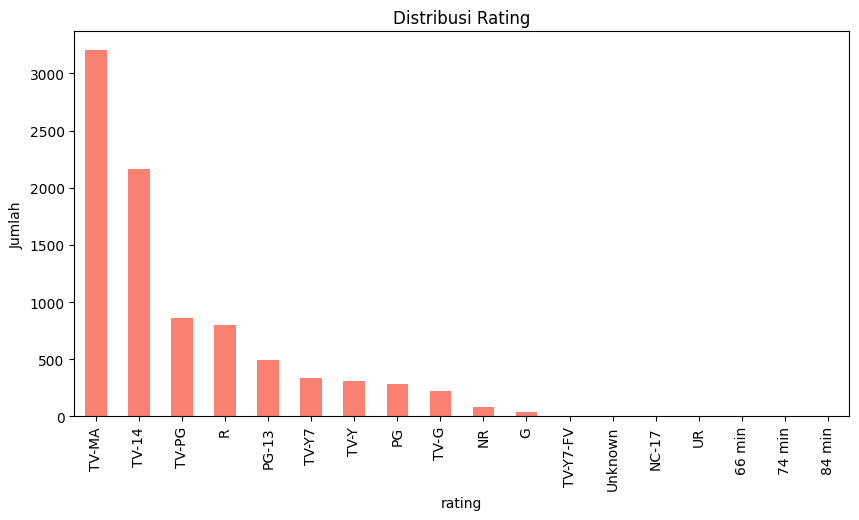

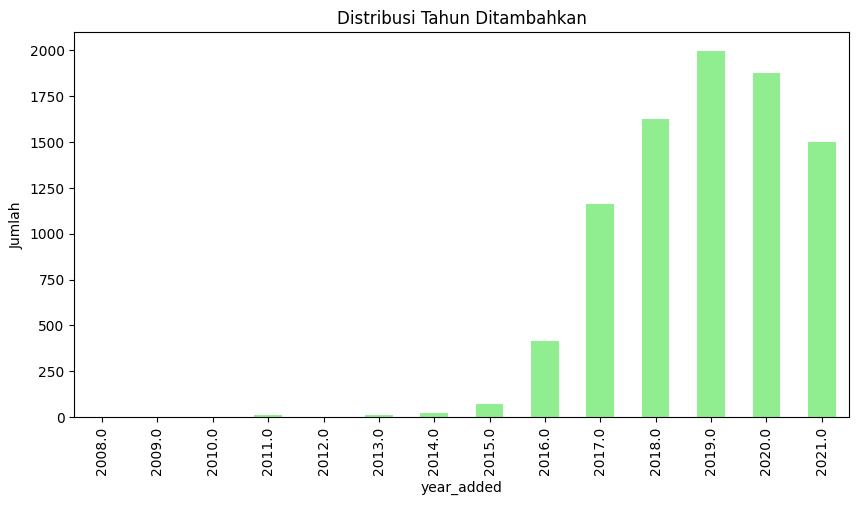

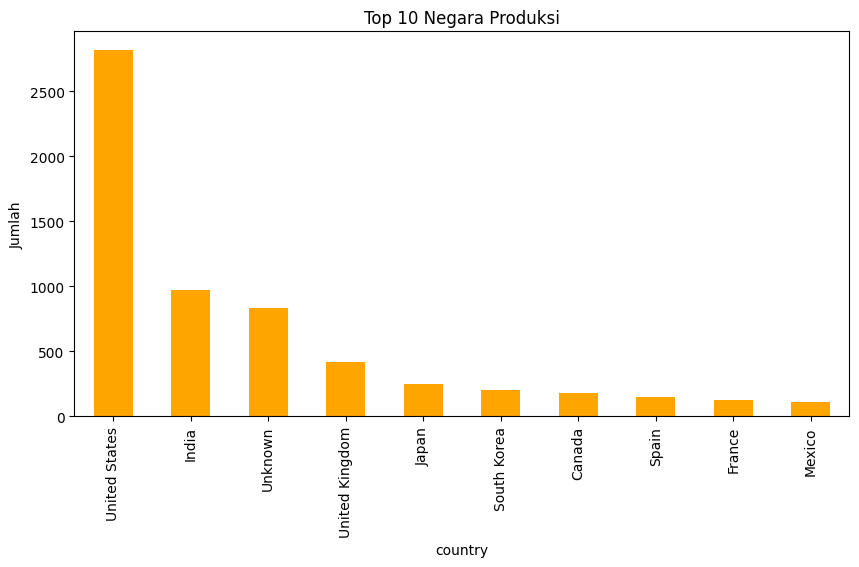

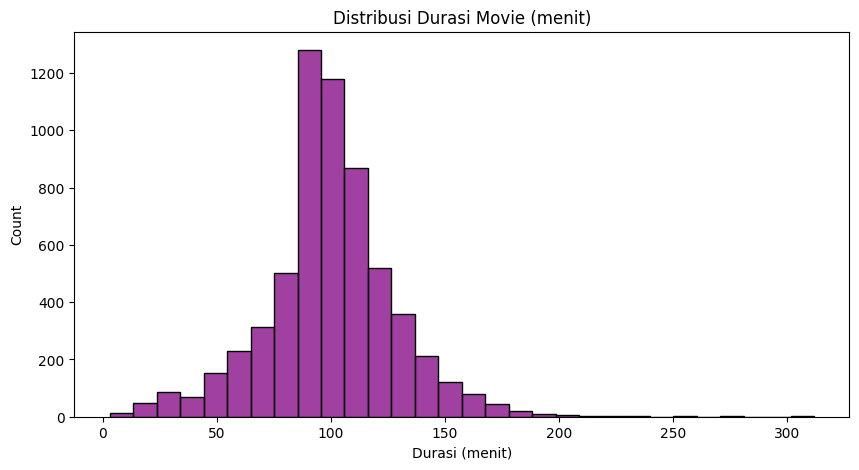

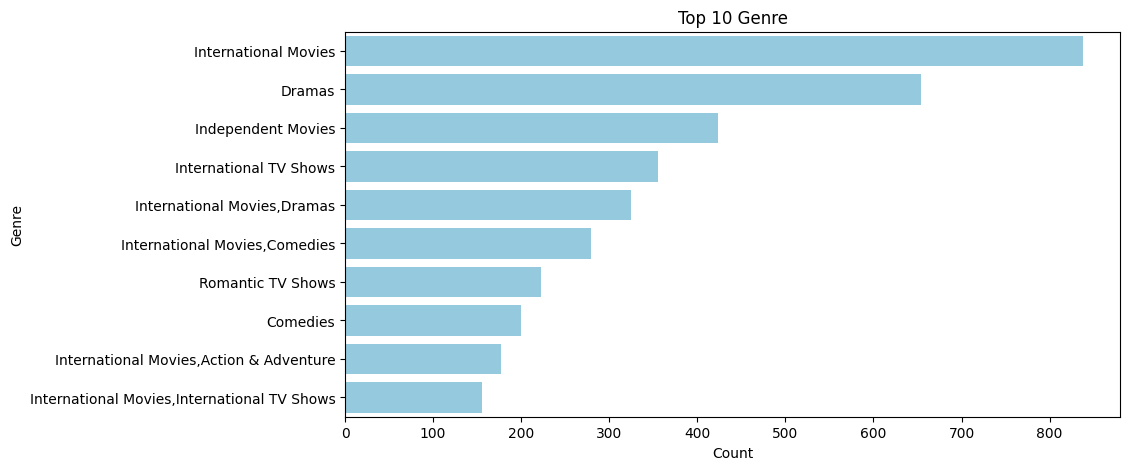

In [ ]:
# ======================
# 📌 LIBRARY IMPORT
# ======================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import urllib.request
from collections import Counter

# ======================
# 📌 DOWNLOAD & LOAD
# ======================
url_netflix = 'https://raw.githubusercontent.com/farrelrassya/teachingMLDL/main/01.%20Machine%20Learning/05.%20Week%205/Datasets/netflix_titles.csv'
urllib.request.urlretrieve(url_netflix, '/content/netflix_titles.csv')

df = pd.read_csv('/content/netflix_titles.csv')
print(f"Dataset shape: {df.shape}")
df.head()

# ======================
# 📌 FEATURE ENGINEERING
# ======================
print("\nMissing value per kolom:")
print(df.isnull().sum())

# Imputasi missing value
df['country'] = df['country'].fillna('Unknown')
df['director'] = df['director'].fillna('Unknown')
df['cast'] = df['cast'].fillna('Unknown')
df['rating'] = df['rating'].fillna('Unknown')
df['date_added'] = df['date_added'].fillna('Unknown')
df['duration'] = df['duration'].fillna('Unknown')

# Parse date
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

# ======================
# 📌 EDA & VISUALISASI
# ======================

# Distribusi type
plt.figure(figsize=(6,4))
df['type'].value_counts().plot(kind='bar', color='skyblue')
plt.title("Distribusi Type (Movie/TV Show)")
plt.ylabel("Jumlah")
plt.show()

# Distribusi rating
plt.figure(figsize=(10,5))
df['rating'].value_counts().plot(kind='bar', color='salmon')
plt.title("Distribusi Rating")
plt.ylabel("Jumlah")
plt.show()

# Distribusi tahun ditambahkan
plt.figure(figsize=(10,5))
df['year_added'].value_counts().sort_index().plot(kind='bar', color='lightgreen')
plt.title("Distribusi Tahun Ditambahkan")
plt.ylabel("Jumlah")
plt.show()

# Top 10 negara
plt.figure(figsize=(10,5))
df['country'].value_counts().head(10).plot(kind='bar', color='orange')
plt.title("Top 10 Negara Produksi")
plt.ylabel("Jumlah")
plt.show()

# Distribusi durasi movie
df_movie = df[df['type'] == 'Movie'].copy()  # aman modifikasi
df_movie['duration_num'] = df_movie['duration'].str.extract('(\d+)').astype(float)

plt.figure(figsize=(10,5))
sns.histplot(df_movie['duration_num'].dropna(), bins=30, color='purple')
plt.title("Distribusi Durasi Movie (menit)")
plt.xlabel("Durasi (menit)")
plt.show()

# Top 10 genre
genres = ','.join(df['listed_in'].dropna()).split(', ')
genre_count = Counter(genres)
genre_df = pd.DataFrame(genre_count.items(), columns=['Genre', 'Count']).sort_values(by='Count', ascending=False)

plt.figure(figsize=(10,5))
sns.barplot(x='Count', y='Genre', data=genre_df.head(10), color='skyblue')
plt.title("Top 10 Genre")
plt.show()


### 📌 Penjelasan Metrik Evaluasi Klasifikasi

---

#### 1️⃣ Akurasi  
Akurasi mengukur proporsi prediksi yang benar dibandingkan seluruh prediksi.  
Semakin tinggi akurasi, semakin banyak prediksi yang tepat (baik positif maupun negatif).  
**Rumus:**  
\[
Akurasi = (TP + TN) / (TP + TN + FP + FN)
\]
di mana:  
- **TP** = True Positive (positif yang diprediksi benar)  
- **TN** = True Negative (negatif yang diprediksi benar)  
- **FP** = False Positive (negatif yang diprediksi positif salah)  
- **FN** = False Negative (positif yang diprediksi negatif salah)

---

#### 2️⃣ Presisi  
Presisi menunjukkan seberapa banyak prediksi positif yang benar-benar positif.  
Cocok digunakan saat fokus mengurangi kesalahan positif palsu (FP).  
**Rumus:**  
\[
Presisi = TP / (TP + FP)
\]

---

#### 3️⃣ Recall (Sensitivitas)  
Recall menunjukkan seberapa banyak kasus positif yang berhasil dikenali.  
Cocok digunakan saat kita ingin meminimalkan kasus positif yang terlewat (FN).  
**Rumus:**  
\[
Recall = TP / (TP + FN)
\]

---

#### 4️⃣ F1-Score  
F1-Score adalah rata-rata harmonis antara presisi dan recall.  
Cocok jika ingin keseimbangan antara presisi dan recall.  
**Rumus:**  
\[
F1 = 2 * (Presisi * Recall) / (Presisi + Recall)
\]

---

#### 5️⃣ AUC (Area Under Curve)  
AUC mengukur area di bawah kurva ROC.  
Semakin mendekati 1, semakin baik model dalam membedakan kelas positif dan negatif.

---

#### 6️⃣ ROC Curve  
ROC Curve menggambarkan hubungan antara TPR dan FPR pada berbagai threshold.  
- **TPR (True Positive Rate) / Recall:**  
\[
TPR = TP / (TP + FN)
\]  
- **FPR (False Positive Rate):**  
\[
FPR = FP / (FP + TN)
\]

ROC membantu memahami trade-off antara sensitivitas dan spesifisitas.

---